# Classified Ads for Cars

## Data Description 

### Link to the dataset : https://www.kaggle.com/mirosval/personal-cars-classifieds

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration and Cleaning

In [2]:
carData = pd.read_csv("all_anonymized_2015_11_2017_03.csv")

C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
carData.head(10)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
5,skoda,fabia,140932.0,2003.0,1200.0,40.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.894643+00,2016-01-27 20:40:15.46361+00,1628.42
6,skoda,fabia,167220.0,2001.0,1400.0,74.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.915376+00,2016-01-27 20:40:15.46361+00,2072.54
7,bmw,NaN,148500.0,2009.0,2000.0,130.0,NaN,NaN,None,auto,5,5,diesel,2015-11-14 18:10:06.924123+00,2016-01-27 20:40:15.46361+00,10547.74
8,skoda,octavia,105389.0,2003.0,1900.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.936239+00,2016-01-27 20:40:15.46361+00,4293.12
9,NaN,NaN,301381.0,2002.0,1900.0,88.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.954319+00,2016-01-27 20:40:15.46361+00,1332.35


In [4]:
carData.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [5]:
carData = carData.drop(columns =['model','color_slug', 'stk_year'])

In [6]:
carData['date_created'] = carData['date_created'].str.slice(0, 10)
carData['date_last_seen'] = carData['date_last_seen'].str.slice(0, 10)

In [7]:
carData = carData[carData['body_type'].notna()]
carData = carData[carData['fuel_type'].notna()]

In [8]:
carData['body_type'].value_counts()

compact         241948
other           122159
coupe            68738
stationwagon     68092
van              30728
offroad          21835
sedan            19149
convertible       5303
transporter       4440
Name: body_type, dtype: int64

In [9]:
carData['seat_count'].value_counts()

None     237765
5.0      160410
5         13172
0.0       11322
7.0        9805
4.0        9043
4          6372
3.0        4346
2.0        3841
2          2869
7          2467
3          1729
9.0        1721
6.0        1517
8.0         886
6           462
9           380
1.0         190
8           156
1            11
21.0          9
14.0          5
50.0          5
51.0          4
18.0          4
57            4
52.0          3
29.0          3
81.0          3
15.0          3
16.0          3
17.0          3
33.0          2
49.0          2
17            2
512.0         2
53.0          2
58.0          2
13.0          2
32.0          2
44.0          2
57.0          2
55.0          2
36.0          2
43.0          1
19.0          1
54.0          1
10.0          1
23.0          1
59.0          1
25.0          1
85.0          1
138.0         1
515.0         1
517.0         1
30.0          1
45.0          1
Name: seat_count, dtype: int64

In [10]:
carData['door_count'].value_counts()

None    233523
5.0     160334
4.0      17846
5        13231
3.0       9338
0.0       7668
2         7290
4         7053
3         4242
2.0       3839
6.0        229
1.0         89
6           41
7.0         15
55.0         9
1            8
58.0         2
9.0          2
8.0          2
49.0         1
45.0         1
17.0         1
7            1
22.0         1
Name: door_count, dtype: int64

In [11]:
#drop all the None values
carData = carData[carData['seat_count'] != 'None']
carData = carData[carData['door_count'] != 'None']

#convert everything to numeric
carData[['seat_count', 'door_count']] = carData[['seat_count', 'door_count']].apply(pd.to_numeric)

carData = carData[carData['seat_count'] <= 9] #drop values greater than 9
carData['seat_count'] = carData['seat_count'].astype(np.int64)
carData = carData[carData['door_count'] <= 7] #drop values greater than 7
carData['door_count'] = carData['door_count'].astype(np.int64)

In [12]:
carData['seat_count'].value_counts().sort_index()

0      8629
1       198
2      5095
3      5251
4     15148
5    170986
6      1893
7     12023
8       991
9      2018
Name: seat_count, dtype: int64

Text(0.5, 1.0, 'Car Seat Counts')

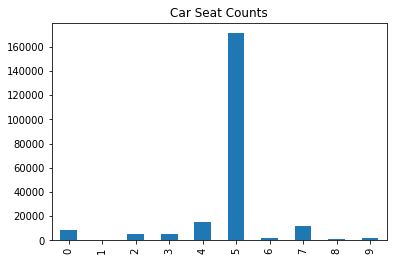

In [13]:
carData['seat_count'].value_counts().sort_index().plot('bar')
plt.title("Car Seat Counts")

In [14]:
carData['door_count'].value_counts().sort_index()

0      7653
1        85
2     10010
3     12587
4     23968
5    167650
6       264
7        15
Name: door_count, dtype: int64

Text(0.5, 1.0, 'Car Door Counts')

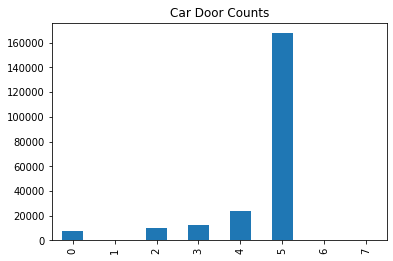

In [15]:
carData['door_count'].value_counts().sort_index().plot('bar')
plt.title("Car Door Counts")

In [16]:
carData['maker'] = carData['maker'].fillna(carData['maker'].mode()[0])
carData['transmission'] = carData['transmission'].fillna(carData['transmission'].mode()[0])

carData['manufacture_year'] = carData['manufacture_year'].fillna(carData['manufacture_year'].mode()[0])
carData['manufacture_year'] = carData['manufacture_year'].astype(np.int64)

carData = carData[carData['mileage'] != 0] # remove cars without any mileage
carData['mileage'] = carData['mileage'].fillna(carData['mileage'].mean())
carData['mileage (log)'] = np.log(carData['mileage'])
carData = carData.drop(columns=['mileage'])

carData['engine_displacement'] = carData['engine_displacement'].fillna(carData['engine_displacement'].mean())
carData['engine_power'] = carData['engine_power'].fillna(carData['engine_power'].mean())
carData['engine_displacement (log)'] = np.log(carData['engine_displacement'])
carData = carData.drop(columns=['engine_displacement'])

Text(0.5, 1.0, 'Automatic and Manual Car Counts')

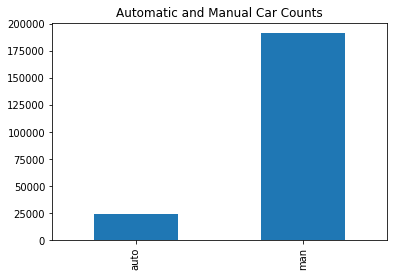

In [17]:
carData['transmission'].value_counts().sort_index().plot('bar')
plt.title("Automatic and Manual Car Counts")

In [18]:
carData[['date_created','date_last_seen']] = carData[['date_created','date_last_seen']].apply(pd.to_datetime)
carData['ad_day_count'] = (carData['date_last_seen'] - carData['date_created']).dt.days
carData = carData.drop(columns =['date_created','date_last_seen'])

In [19]:
carData.isnull().sum()

maker                        0
manufacture_year             0
engine_power                 0
body_type                    0
transmission                 0
door_count                   0
seat_count                   0
fuel_type                    0
price_eur                    0
mileage (log)                0
engine_displacement (log)    0
ad_day_count                 0
dtype: int64

In [20]:
carData.head(10)

,maker,manufacture_year,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,mileage (log),engine_displacement (log),ad_day_count
507,mercedes-benz,2011,120.0,van,man,5,5,diesel,22168.76,12.223878,7.669962,74
577,skoda,2007,96.0,van,man,5,9,diesel,8475.20,12.409013,7.808323,74
583,skoda,2005,128.0,van,man,5,8,diesel,9215.40,12.421184,7.808323,74
898,ford,2011,103.0,van,man,5,5,diesel,9437.45,11.830040,7.600902,74
972,skoda,2016,79.0,van,man,5,5,diesel,4441.15,12.055250,7.599401,74
1007,hyundai,2002,90.0,van,man,5,5,gasoline,1073.28,12.111762,7.492760,74
1038,skoda,2016,55.0,van,man,3,2,diesel,5162.84,11.716307,7.286876,74
1079,chrysler,2012,214.0,van,auto,5,7,gasoline,18467.80,11.718312,8.189800,74
1320,skoda,2004,96.0,van,man,4,6,diesel,8845.30,11.957611,7.824046,74
1603,fiat,2006,77.0,van,man,4,5,diesel,3515.91,11.955192,7.554859,74


In [21]:
carData = pd.concat([carData,pd.get_dummies(carData.maker)],axis="columns")
carData = carData.drop(columns=['maker'])

In [22]:
carData = carData.drop(columns=['manufacture_year'])

In [23]:
carData = pd.concat([carData,pd.get_dummies(carData.body_type)],axis="columns")
carData = carData.drop(columns=['body_type'])

In [24]:
carData['transmission'] = carData['transmission'].map( {'man': 1, 'auto': 0} ).astype(int)

In [25]:
carData = pd.concat([carData,pd.get_dummies(carData.door_count,prefix='door_count')],axis="columns")
carData = carData.drop(columns=['door_count'])

In [26]:
carData = pd.concat([carData,pd.get_dummies(carData.seat_count,prefix='seat_count')],axis="columns")
carData = carData.drop(columns=['seat_count'])

In [27]:
carData = pd.concat([carData,pd.get_dummies(carData.fuel_type)],axis="columns")
carData = carData.drop(columns=['fuel_type'])

In [28]:
carData.head(10)

,engine_power,transmission,price_eur,mileage (log),engine_displacement (log),ad_day_count,alfa-romeo,aston-martin,audi,bentley,...,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,cng,diesel,electric,gasoline,lpg
507,120.0,1,22168.76,12.223878,7.669962,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
577,96.0,1,8475.20,12.409013,7.808323,74,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
583,128.0,1,9215.40,12.421184,7.808323,74,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
898,103.0,1,9437.45,11.830040,7.600902,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
972,79.0,1,4441.15,12.055250,7.599401,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1007,90.0,1,1073.28,12.111762,7.492760,74,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1038,55.0,1,5162.84,11.716307,7.286876,74,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1079,214.0,0,18467.80,11.718312,8.189800,74,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1320,96.0,1,8845.30,11.957611,7.824046,74,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1603,77.0,1,3515.91,11.955192,7.554859,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [29]:
carData.shape

(215738, 84)

In [30]:
carDataSample = carData.sample(n = 25000, random_state=0)
carDataSample = carDataSample.loc[:, (carDataSample != 0).any(axis=0)]

In [31]:
#regress sample
X = carDataSample.loc[:, carDataSample.columns != 'price_eur']
y = np.log(carDataSample['price_eur'])

# Regression Algorithms

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [33]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

<b>Linear Regression</b>

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.4f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lr.score(X_test, y_test)))

y_predlr = lr.predict(X_test)
print("R^2: ", r2_score(y_test, y_predlr))

lr.coef_: [ 1.75270705e-02 -7.69066591e-02 -7.99034741e-02 -2.03509959e-02
  1.23594570e-01 -9.70645140e+09 -1.09433982e+09 -2.72908675e+10
 -3.45977569e+09 -3.13312007e+10 -1.19002124e+10 -7.57229970e+09
 -3.04481376e+10 -1.00075651e+10 -6.08814964e+09 -2.46299445e+10
 -4.21486949e+10 -1.29003162e+10 -2.89488771e+09 -2.64800818e+10
 -1.09433982e+09 -2.68021672e+09 -6.65021552e+09 -9.13904057e+09
 -1.84917493e+10 -1.54758895e+09 -5.46819593e+09 -1.11294233e+10
 -4.89155607e+09 -1.09433982e+09 -1.71538033e+10 -2.91009479e+10
 -1.06950976e+10 -1.27160568e+10 -1.62089136e+10 -3.19318439e+10
 -3.14178624e+10 -1.00666880e+10 -3.02134482e+10 -1.09433982e+09
 -5.01221961e+09 -1.94980746e+10 -6.71221250e+10 -1.02997245e+10
 -1.07503688e+10 -1.36116841e+10 -1.09433982e+09 -2.05358671e+10
 -4.63188983e+10 -1.79498243e+10 -7.42166695e+10 -5.38882696e+10
 -1.74060784e+11 -1.08301227e+11 -8.38132334e+10 -1.05199971e+11
 -1.74172859e+11 -4.48626785e+10 -1.25454313e+11  3.13728281e+10
  4.52602031e+0

<b>Lasso Regression</b>

In [35]:
from sklearn.linear_model import Lasso

lasso_params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}
lasso_reg = Lasso()

lasso = GridSearchCV(lasso_reg,lasso_params,cv=2,return_train_score=True)
lasso.fit(X_train,y_train)

print(lasso.cv_results_)
print(lasso.best_estimator_)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

y_pred_lasso = lasso.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_lasso))

C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.647805831031064, tolerance: 0.49814769452661495
  positive)
C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.12684218289519, tolerance: 0.4918917331247483
  positive)


{'mean_fit_time': array([0.4844749 , 0.06781888, 0.03590417, 0.03939402, 0.02842486]), 'std_fit_time': array([0.03368187, 0.0009973 , 0.00299263, 0.00049913, 0.00049841]), 'mean_score_time': array([0.0019958 , 0.00199461, 0.00199568, 0.00199413, 0.00149536]), 'std_score_time': array([4.76837158e-07, 2.38418579e-07, 9.98377800e-04, 9.97543335e-04,
       4.98771667e-04]), 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}], 'split0_test_score': array([ 4.91439174e-01,  4.92299615e-01,  4.87489876e-01,  3.35825963e-01,
       -1.01362112e-05]), 'split1_test_score': array([ 4.93375979e-01,  4.94400977e-01,  4.94609780e-01,  3.50109979e-01,
       -1.00089162e-05]), 'mean_test_score': array([ 4.92407577e-01,  4.93350296e-01,  4.91049828e-01,  3.42967971e-01,
       -1.00725637e-05]

<b>Ridge Regression</b>

In [36]:
from  sklearn.linear_model import Ridge

ridge_params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}
ridge_reg = Ridge()


ridge = GridSearchCV(ridge_reg,ridge_params,cv=2,return_train_score=True)
ridge.fit(X_train,y_train)

print(ridge.cv_results_)
print(ridge.best_estimator_)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

y_pred_ridge = ridge.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_ridge))

{'mean_fit_time': array([0.02917564, 0.02742732, 0.02293932, 0.02443564, 0.02443528]), 'std_fit_time': array([1.25157833e-03, 4.48763371e-03, 1.19209290e-07, 1.49571896e-03,
       4.98533249e-04]), 'mean_score_time': array([0.00249493, 0.00199401, 0.00199437, 0.0014956 , 0.0009973 ]), 'std_score_time': array([4.99606133e-04, 3.57627869e-07, 2.38418579e-07, 4.97817993e-04,
       2.38418579e-07]), 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}], 'split0_test_score': array([0.49131932, 0.49131932, 0.49131935, 0.49131961, 0.49132219]), 'split1_test_score': array([0.49323045, 0.49323045, 0.49323049, 0.49323087, 0.49323465]), 'mean_test_score': array([0.49227488, 0.49227489, 0.49227492, 0.49227524, 0.49227842]), 'std_test_score': array([0.00095557, 0.00095557, 0.00095557, 0.000

<b>Polynomial Regression</b>

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr.fit(X_train_poly, y_train)

print("Train score: {:.4f}".format(lr.score(X_train_poly, y_train)))
print("Test score: {:.4f}".format(lr.score(X_test_poly, y_test)))

Train score: 0.5048
Test score: 0.4948


<b>KNN Regressor</b>

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {'n_neighbors':[41, 43, 45, 47, 49],
              'p': [1]}
knn_reg = KNeighborsRegressor()

knn = GridSearchCV(knn_reg,knn_params,cv=2,return_train_score=True)
knn.fit(X, y)

print(knn.cv_results_)
print(knn.best_estimator_)
print('Train score: {:.4f}'.format(knn.score(X_train,y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test,y_test)))

y_pred_knn = knn.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_knn))

{'mean_fit_time': array([0.05583167, 0.04637539, 0.04637587, 0.04637516, 0.04638779]), 'std_fit_time': array([0.00600219, 0.00049913, 0.00049865, 0.00049913, 0.00048625]), 'mean_score_time': array([1.60735631, 1.49598241, 1.50476301, 1.55376279, 1.57047701]), 'std_score_time': array([0.05850005, 0.02870178, 0.01510227, 0.02334559, 0.01112604]), 'param_n_neighbors': masked_array(data=[41, 43, 45, 47, 49],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_p': masked_array(data=[1, 1, 1, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 41, 'p': 1}, {'n_neighbors': 43, 'p': 1}, {'n_neighbors': 45, 'p': 1}, {'n_neighbors': 47, 'p': 1}, {'n_neighbors': 49, 'p': 1}], 'split0_test_score': array([0.46468999, 0.46186829, 0.45842452, 0.45461722, 0.45140837]), 'split1_test_score': array([0.46637075, 0.46261393, 0.45860461, 0.45515418, 0.45234337]),

<b>Simple SVM</b>

In [39]:
from sklearn.svm import SVR, LinearSVR

svm_simple_params = {'C':[0.01,0.1,1,10,100],
                     'epsilon':[0.01,0.1,1,10,100]
                    }

svm_simple_reg = LinearSVR()
svm_simple = GridSearchCV(estimator=svm_simple_reg,param_grid=svm_simple_params,cv=2,return_train_score=True)

svm_simple.fit(X, y)

print(svm_simple.cv_results_)
print(svm_simple.best_estimator_)
print('Train score: {:.4f}'.format(svm_simple.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svm_simple.score(X_test,y_test)))

y_pred_svm_simple = svm_simple.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_svm_simple))

C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:9

{'mean_fit_time': array([0.76583171, 0.76123202, 0.66348422, 0.02642918, 0.01745307,
       0.80064297, 0.80664229, 0.83175373, 0.03581667, 0.02044654,
       1.11144495, 1.03719151, 0.76867998, 0.02994645, 0.02343774,
       0.96011519, 0.87726378, 0.70057905, 0.0274266 , 0.01870346,
       0.81037676, 0.80570483, 0.71254623, 0.03593719, 0.02451038]), 'std_fit_time': array([0.00765777, 0.0057472 , 0.00723922, 0.00847745, 0.00049889,
       0.00377274, 0.01971579, 0.08674431, 0.00789261, 0.00049829,
       0.02472639, 0.15252769, 0.01226628, 0.00900424, 0.00049877,
       0.09335732, 0.02801728, 0.00746024, 0.00747979, 0.0007515 ,
       0.00248206, 0.00870514, 0.01744068, 0.00293028, 0.00150228]), 'mean_score_time': array([0.00669158, 0.00603461, 0.00598419, 0.00598407, 0.00598431,
       0.00682092, 0.00644052, 0.00648189, 0.00598264, 0.00648355,
       0.00747907, 0.00698054, 0.00601959, 0.00745285, 0.00847757,
       0.00648189, 0.00642192, 0.0065546 , 0.00698197, 0.00598443,
     

C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<b>SVM with kernels</b>

In [40]:
svm_rbf_params = {'C':[1,10,100],
                  'gamma':[.01,.1,1],
                  'kernel':['rbf']
                 }

svm_rbf_reg = SVR()
svm_rbf = GridSearchCV(svm_rbf_reg,svm_rbf_params,cv=2,return_train_score=True)

svm_rbf.fit(X, y)

print(svm_rbf.cv_results_)
print(svm_rbf.best_estimator_)
print('Train score: {:.4f}'.format(svm_rbf.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svm_rbf.score(X_test,y_test)))

y_pred_svm_rbf = svm_rbf.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_svm_rbf))

{'mean_fit_time': array([  5.20537913,  12.98579061,  78.5156287 ,  10.18598843,
        34.3543942 , 102.05848157,  42.73902678,  40.28785539,
        97.84189069]), 'std_fit_time': array([0.02559865, 0.20185959, 1.0543021 , 0.62326336, 0.10673261,
       9.79068315, 1.35987496, 5.52351832, 6.26210058]), 'mean_score_time': array([ 3.34664834,  6.46870792, 15.06514335,  4.05154514,  7.55643272,
       15.78536093,  5.11320508,  7.09081078, 15.99546146]), 'std_score_time': array([0.12756217, 0.02061307, 0.68904543, 0.00678253, 0.1431179 ,
       0.25896895, 0.30624282, 0.13255644, 0.03635192]), 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 100, 100, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.01, 0.1, 1, 0.01, 0.1, 1, 0.01, 0.1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
 

In [43]:
'''
svm_poly_params = {'C':[1,10,100],
                  'gamma':[.01,.1,1],
                  'kernel':['poly']
                 }

svm_poly_reg = SVR()
svm_poly = GridSearchCV(svm_poly_reg,svm_poly_params,cv=2,return_train_score=True,n_jobs=-1)

svm_poly.fit(X, y)

print(svm_poly.cv_results_)
print(svm_poly.best_estimator_)
print('Train score: {:.4f}'.format(svm_poly.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svm_poly.score(X_test,y_test)))

y_pred_svm_poly = svm_poly.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_svm_poly))
'''

'\nsvm_poly_params = {\'C\':[1,10,100],\n                  \'gamma\':[.01,.1,1],\n                  \'kernel\':[\'poly\']\n                 }\n\nsvm_poly_reg = SVR()\nsvm_poly = GridSearchCV(svm_poly_reg,svm_poly_params,cv=2,return_train_score=True,n_jobs=-1)\n\nsvm_poly.fit(X, y)\n\nprint(svm_poly.cv_results_)\nprint(svm_poly.best_estimator_)\nprint(\'Train score: {:.4f}\'.format(svm_poly.score(X_train,y_train)))\nprint(\'Test score: {:.4f}\'.format(svm_poly.score(X_test,y_test)))\n\ny_pred_svm_poly = svm_poly.predict(X_test)\nprint("R^2: ", r2_score(y_test, y_pred_svm_poly))\n'

In [44]:
'''
svm_linear_params = {'C':[1,10,100],
                     'gamma':[.01,.1,1],
                     'kernel':['linear']
                    }

svm_linear_reg = SVR()
svm_linear = GridSearchCV(svm_linear_reg,svm_linear_params,cv=2,return_train_score=True,n_jobs=-1)

svm_linear.fit(X, y)

print(svm_linear.cv_results_)
print(svm_linear.best_estimator_)
print('Train score: {:.4f}'.format(svm_linear.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svm_linear.score(X_test,y_test)))

y_pred_svm_linear = svm_linear.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_svm_linear))
'''

'\nsvm_linear_params = {\'C\':[1,10,100],\n                     \'gamma\':[.01,.1,1],\n                     \'kernel\':[\'linear\']\n                    }\n\nsvm_linear_reg = SVR()\nsvm_linear = GridSearchCV(svm_linear_reg,svm_linear_params,cv=2,return_train_score=True,n_jobs=-1)\n\nsvm_linear.fit(X, y)\n\nprint(svm_linear.cv_results_)\nprint(svm_linear.best_estimator_)\nprint(\'Train score: {:.4f}\'.format(svm_linear.score(X_train,y_train)))\nprint(\'Test score: {:.4f}\'.format(svm_linear.score(X_test,y_test)))\n\ny_pred_svm_linear = svm_linear.predict(X_test)\nprint("R^2: ", r2_score(y_test, y_pred_svm_linear))\n'

# Conclusion

<b>The ridge regression model works the best for the regressing data. It had a training score of 0.5048, and a test set score of 0.4948. The R^2 value was 0.4947714169929378.</b>